In [72]:
import time
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas
from datetime import datetime, timedelta

In [52]:
#function to get the data from the API 
def Get_fire_incident_data(base_url, chunk_size=1000, max_records=5000):
    all_data = []
    offset = 0

    while True:
        #The API is allowing maximum 1000 rows of data per API call. in order to get the maximum data hitting the API in loop until we reach the max limit
        paginated_url = f"{base_url}?$offset={offset}&$limit={chunk_size}"
        
        try:
            response = requests.get(paginated_url, timeout=10)
            response.raise_for_status()
            data = response.json()

            #Appending the data into the list all_data
            all_data.extend(data)
            offset += chunk_size

            print(offset)

            # Stop after max_records
            if max_records and len(all_data) >= max_records:
                print("Reached max_records limit.")
                break

            # Optional: Sleep to be gentle to the server
            time.sleep(0.5)
        except requests.exceptions.HTTPError as http_err:
            print(f"HTTP error occurred: {http_err}")
            break
        except requests.exceptions.RequestException as e:
            print(f"Request failed at offset {offset}: {e}")
            break
        except ValueError as e:
            print(f"Failed to parse JSON at offset {offset}: {e}")
            break

    # Convert to DataFrame
    return pd.DataFrame(all_data,index=None)

# Base URL for the data
base_url = "https://data.sfgov.org/resource/wr8u-xric.json"

# Fetch all data in chunks of 1000 rows
df = Get_fire_incident_data(base_url, chunk_size=1000)


1000
2000
3000
4000
5000
Reached max_records limit.


In [53]:
#to save the file in Local for further use
df.to_csv('C:/Users/admin/Desktop/option_chain_analysis/untitled/{}.csv'.format('Fire_incident'))

In [54]:
#to check total count in a dataframe
print(len(df))

5000


In [55]:
df.columns

Index(['incident_number', 'exposure_number', 'id', 'address', 'incident_date',
       'call_number', 'alarm_dttm', 'arrival_dttm', 'close_dttm', 'city',
       'zipcode', 'battalion', 'station_area', 'box', 'suppression_units',
       'suppression_personnel', 'ems_units', 'ems_personnel', 'other_units',
       'other_personnel', 'fire_fatalities', 'fire_injuries',
       'civilian_fatalities', 'civilian_injuries', 'number_of_alarms',
       'primary_situation', 'mutual_aid', 'action_taken_primary',
       'property_use', 'area_of_fire_origin', 'ignition_cause',
       'ignition_factor_primary', 'heat_source', 'item_first_ignited',
       'human_factors_associated_with_ignition', 'no_flame_spread',
       'supervisor_district', 'neighborhood_district', 'point', 'data_as_of',
       'data_loaded_at', 'estimated_property_loss',
       'detector_alerted_occupants', 'action_taken_secondary',
       'estimated_contents_loss', 'structure_type', 'structure_status',
       'floor_of_fire_origin

In [56]:
#as per SF there are 66 columns but while hitting the API i am getting 66 columns 
print(len(df.columns))

64


In [57]:
print(df.count())

incident_number                                 5000
exposure_number                                 5000
id                                              5000
address                                         4994
incident_date                                   5000
                                                ... 
number_of_floors_with_heavy_damage                 2
number_of_floors_with_minimum_damage               4
number_of_floors_with_extreme_damage               1
number_of_floors_with_significant_damage           2
automatic_extinguishing_sytem_failure_reason       1
Length: 64, dtype: int64


In [58]:
print(df.dtypes)

incident_number                                 object
exposure_number                                 object
id                                              object
address                                         object
incident_date                                   object
                                                 ...  
number_of_floors_with_heavy_damage              object
number_of_floors_with_minimum_damage            object
number_of_floors_with_extreme_damage            object
number_of_floors_with_significant_damage        object
automatic_extinguishing_sytem_failure_reason    object
Length: 64, dtype: object


In [59]:
df = df.astype({
   'incident_number': 'int',
    'exposure_number': 'int',
    'id': 'string',
    'address': 'string',
    'incident_date': 'datetime64[ns]',
    'call_number': 'string',
    'alarm_dttm': 'datetime64[ns]',
    'arrival_dttm': 'datetime64[ns]',
    'close_dttm': 'datetime64[ns]',
    'city': 'string',
    'zipcode': 'string',
    'battalion': 'string',
    'station_area': 'string',
    'box': 'string',
    'suppression_units': 'int',
    'suppression_personnel': 'int',
    'ems_units': 'int',
    'ems_personnel': 'int',
    'other_units': 'int',
    'other_personnel': 'int',
    'estimated_property_loss': 'float',
    'estimated_contents_loss': 'float',
    'fire_fatalities': 'int',
    'fire_injuries': 'int',
    'civilian_fatalities': 'int',
    'civilian_injuries': 'int',
    'number_of_alarms': 'int',
    'primary_situation': 'string',
    'mutual_aid': 'string',
    'action_taken_primary': 'string',
    'action_taken_secondary': 'string',
    'action_taken_other': 'string',
    'detector_alerted_occupants': 'string',
    'property_use': 'string',
    'area_of_fire_origin': 'string',
    'ignition_cause': 'string',
    'ignition_factor_primary': 'string',
    'ignition_factor_secondary': 'string',
    'heat_source': 'string',
    'item_first_ignited': 'string',
    'human_factors_associated_with_ignition': 'string',
    'structure_type': 'string',
    'structure_status': 'string',
    'floor_of_fire_origin': 'float',
    'fire_spread': 'string',
    'no_flame_spread': 'string',
    'number_of_floors_with_minimum_damage': 'float',
    'number_of_floors_with_significant_damage': 'float',
    'number_of_floors_with_heavy_damage': 'float',
    'number_of_floors_with_extreme_damage': 'float',
    'detectors_present': 'string',
    'detector_type': 'string',
    'detector_operation': 'string',
    'detector_effectiveness': 'string',
    'automatic_extinguishing_system_present': 'string',
    'automatic_extinguishing_sytem_type': 'string',
    'automatic_extinguishing_sytem_perfomance': 'string',
    'number_of_sprinkler_heads_operating': 'float',
    'supervisor_district': 'string',
    'neighborhood_district': 'string',
    'point': 'object',
    'data_as_of': 'datetime64[ns]',
    'data_loaded_at': 'datetime64[ns]'
})

In [60]:
print(df.dtypes)

incident_number                                          int32
exposure_number                                          int32
id                                              string[python]
address                                         string[python]
incident_date                                   datetime64[ns]
                                                     ...      
number_of_floors_with_heavy_damage                     float64
number_of_floors_with_minimum_damage                   float64
number_of_floors_with_extreme_damage                   float64
number_of_floors_with_significant_damage               float64
automatic_extinguishing_sytem_failure_reason            object
Length: 64, dtype: object


In [61]:
df.head(20)

,incident_number,exposure_number,id,address,incident_date,call_number,alarm_dttm,arrival_dttm,close_dttm,city,...,automatic_extinguishing_sytem_perfomance,number_of_sprinkler_heads_operating,ignition_factor_secondary,action_taken_other,fire_spread,number_of_floors_with_heavy_damage,number_of_floors_with_minimum_damage,number_of_floors_with_extreme_damage,number_of_floors_with_significant_damage,automatic_extinguishing_sytem_failure_reason
0,18019373,0,180193730,ALAMEDA,2018-02-14,180453395,2018-02-14 18:12:53,2018-02-14 18:15:05,2018-02-14 18:19:44,San Francisco,...,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
1,18019377,0,180193770,17 STREET,2018-02-14,180453425,2018-02-14 18:20:51,2018-02-14 18:23:14,2018-02-14 18:23:33,San Francisco,...,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
2,18019378,0,180193780,MISSION,2018-02-14,180453440,2018-02-14 18:25:41,2018-02-14 18:27:15,2018-02-14 19:37:03,San Francisco,...,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
3,18019383,0,180193830,685 48TH AV 4,2018-02-14,180453455,2018-02-14 18:29:40,2018-02-14 18:35:18,2018-02-14 20:34:26,San Francisco,...,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
4,18019390,0,180193900,38 HARRIET ST 2NFL,2018-02-14,180453522,2018-02-14 18:48:51,2018-02-14 18:53:12,2018-02-14 19:02:12,San Francisco,...,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
5,18019395,0,180193950,1400 BLK FULTON STREET,2018-02-14,180453596,2018-02-14 19:08:46,2018-02-14 19:13:00,2018-02-14 19:29:14,San Francisco,...,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
6,18019401,0,180194010,GREAT HIGHWAY,2018-02-14,180453683,2018-02-14 19:31:37,2018-02-14 19:37:50,2018-02-14 19:40:35,San Francisco,...,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
7,18019402,0,180194020,680 MISSION STREET,2018-02-14,180453685,2018-02-14 19:31:51,2018-02-14 19:35:31,2018-02-14 19:43:24,San Francisco,...,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
8,18019403,0,180194030,3RD ST/JESSIE,2018-02-14,180453686,2018-02-14 19:32:38,2018-02-14 19:36:38,2018-02-14 20:36:52,San Francisco,...,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
9,18019413,0,180194130,LARKIN,2018-02-14,180453808,2018-02-14 20:12:11,2018-02-14 20:16:02,2018-02-14 20:16:27,San Francisco,...,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN


In [62]:
#find the column with max zero or NAN values 
nan_or_zero_counts = ((df == 0) | df.isna()).sum()
drop_columns = []
for index, value in nan_or_zero_counts.items():
    print(f"Index: {index}, Value: {value}")
    if value > 3000:
        drop_columns.append(index)
    else:
        pass
        
print("Column with most NaN or 0 values:", drop_columns)

Index: incident_number, Value: 0
Index: exposure_number, Value: 4999
Index: id, Value: 0
Index: address, Value: 6
Index: incident_date, Value: 0
Index: call_number, Value: 0
Index: alarm_dttm, Value: 0
Index: arrival_dttm, Value: 1
Index: close_dttm, Value: 0
Index: city, Value: 9
Index: zipcode, Value: 0
Index: battalion, Value: 0
Index: station_area, Value: 0
Index: box, Value: 0
Index: suppression_units, Value: 11
Index: suppression_personnel, Value: 11
Index: ems_units, Value: 3946
Index: ems_personnel, Value: 3946
Index: other_units, Value: 4723
Index: other_personnel, Value: 4723
Index: fire_fatalities, Value: 5000
Index: fire_injuries, Value: 5000
Index: civilian_fatalities, Value: 5000
Index: civilian_injuries, Value: 4997
Index: number_of_alarms, Value: 0
Index: primary_situation, Value: 0
Index: mutual_aid, Value: 0
Index: action_taken_primary, Value: 0
Index: property_use, Value: 21
Index: area_of_fire_origin, Value: 4720
Index: ignition_cause, Value: 4720
Index: ignition_fa

In [63]:
#drop the columns which have more NAN and 0 values in it 
df1 = df.drop(columns=drop_columns)

In [64]:
#column with zero or null values in any rows. since all the values are none there is no need of this column hence going to drop it 
'''
cols_with_zero_or_nan = [
    col for col in df.columns
    if (df[col] == 0).any() or df[col].isna().any()
]

print("Columns with 0 or NaN:", cols_with_zero_or_nan)
'''

'\ncols_with_zero_or_nan = [\n    col for col in df.columns\n    if (df[col] == 0).any() or df[col].isna().any()\n]\n\nprint("Columns with 0 or NaN:", cols_with_zero_or_nan)\n'

In [65]:
print(len(df1.columns))

26


In [66]:
df1.columns

Index(['incident_number', 'id', 'address', 'incident_date', 'call_number',
       'alarm_dttm', 'arrival_dttm', 'close_dttm', 'city', 'zipcode',
       'battalion', 'station_area', 'box', 'suppression_units',
       'suppression_personnel', 'number_of_alarms', 'primary_situation',
       'mutual_aid', 'action_taken_primary', 'property_use', 'no_flame_spread',
       'supervisor_district', 'neighborhood_district', 'point', 'data_as_of',
       'data_loaded_at'],
      dtype='object')

In [67]:
#drop all the rows which has no address details on it like city, zipcode, address 
df1 = df1[(df1['address'].isna())  | (df1['city'].isna()) | (df1[['zipcode']] != 0) .all(axis=1)]

In [68]:
print(type(df1['alarm_dttm']))

<class 'pandas.core.series.Series'>


In [69]:
df1.head(10)

,incident_number,id,address,incident_date,call_number,alarm_dttm,arrival_dttm,close_dttm,city,zipcode,...,primary_situation,mutual_aid,action_taken_primary,property_use,no_flame_spread,supervisor_district,neighborhood_district,point,data_as_of,data_loaded_at
0,18019373,180193730,ALAMEDA,2018-02-14,180453395,2018-02-14 18:12:53,2018-02-14 18:15:05,2018-02-14 18:19:44,San Francisco,94103,...,"151 Outside rubbish, trash or waste fire",N None,11 Extinguishment by fire service personnel,"960 Street, other",NO,9,Mission,"{'type': 'Point', 'coordinates': [-122.407815,...",2018-02-14 18:19:44,2025-07-03 02:18:51
1,18019377,180193770,17 STREET,2018-02-14,180453425,2018-02-14 18:20:51,2018-02-14 18:23:14,2018-02-14 18:23:33,San Francisco,94114,...,"712 Direct tie to FD, malicious false alarm",N None,86 Investigate,963 Street or road in commercial area,NA,8,Castro/Upper Market,"{'type': 'Point', 'coordinates': [-122.426228,...",2018-02-14 18:23:33,2025-07-03 02:18:51
2,18019378,180193780,MISSION,2018-02-14,180453440,2018-02-14 18:25:41,2018-02-14 18:27:15,2018-02-14 19:37:03,San Francisco,94103,...,"510 Person in distress, other",N None,"70 Assistance, other",NNN None,NA,9,Mission,"{'type': 'Point', 'coordinates': [-122.419516,...",2018-02-14 19:37:03,2025-07-03 02:18:51
3,18019383,180193830,685 48TH AV 4,2018-02-14,180453455,2018-02-14 18:29:40,2018-02-14 18:35:18,2018-02-14 20:34:26,San Francisco,94121,...,"321 EMS call, excluding vehicle accident with ...",N None,33 Provide advanced life support (ALS),429 Multifamily dwelling,NA,1,Outer Richmond,"{'type': 'Point', 'coordinates': [-122.509198,...",2018-02-14 20:34:26,2025-07-03 02:18:51
4,18019390,180193900,38 HARRIET ST 2NFL,2018-02-14,180453522,2018-02-14 18:48:51,2018-02-14 18:53:12,2018-02-14 19:02:12,San Francisco,94103,...,"700 False alarm or false call, other",N None,63 Restore fire alarm system,429 Multifamily dwelling,NA,6,South of Market,"{'type': 'Point', 'coordinates': [-122.407163,...",2018-02-14 19:02:12,2025-07-03 02:18:51
5,18019395,180193950,1400 BLK FULTON STREET,2018-02-14,180453596,2018-02-14 19:08:46,2018-02-14 19:13:00,2018-02-14 19:29:14,San Francisco,94117,...,"100 Fire, other",N None,11 Extinguishment by fire service personnel,419 1 or 2 family dwelling,NO,2,Western Addition,"{'type': 'Point', 'coordinates': [-122.439847,...",2018-02-14 19:29:14,2025-07-03 02:18:51
6,18019401,180194010,GREAT HIGHWAY,2018-02-14,180453683,2018-02-14 19:31:37,2018-02-14 19:37:50,2018-02-14 19:40:35,San Francisco,94122,...,561 Unauthorized burning,N None,87 Investigate fire out on arrival,937 Beach,NA,4,Sunset/Parkside,"{'type': 'Point', 'coordinates': [-122.5105528...",2018-02-14 19:40:35,2025-07-03 02:18:51
7,18019402,180194020,680 MISSION STREET,2018-02-14,180453685,2018-02-14 19:31:51,2018-02-14 19:35:31,2018-02-14 19:43:24,San Francisco,94103,...,"600 Good intent call, other",N None,63 Restore fire alarm system,"449 Hotel/motel, commercial",NA,6,Financial District/South Beach,"{'type': 'Point', 'coordinates': [-122.401667,...",2018-02-14 19:43:24,2025-07-03 02:18:51
8,18019403,180194030,3RD ST/JESSIE,2018-02-14,180453686,2018-02-14 19:32:38,2018-02-14 19:36:38,2018-02-14 20:36:52,San Francisco,94105,...,"600 Good intent call, other",N None,"80 Information, investigation & enforcement, o...",429 Multifamily dwelling,NA,6,Financial District/South Beach,"{'type': 'Point', 'coordinates': [-122.402579,...",2018-02-14 20:36:52,2025-07-03 02:18:51
9,18019413,180194130,LARKIN,2018-02-14,180453808,2018-02-14 20:12:11,2018-02-14 20:16:02,2018-02-14 20:16:27,San Francisco,94102,...,"700 False alarm or false call, other",N None,"00 Action taken, other","000 Property Use, other",NA,5,Western Addition,"{'type': 'Point', 'coordinates': [-122.420441,...",2018-02-14 20:16:27,2025-07-03 02:18:51


In [70]:
# Convert to period (year-month) for grouping
df1['year_month'] = df1['incident_date'].dt.to_period('m').astype(str)

# Group by year-month
df_grouped = df1.groupby('year_month')['incident_number'].sum().reset_index()


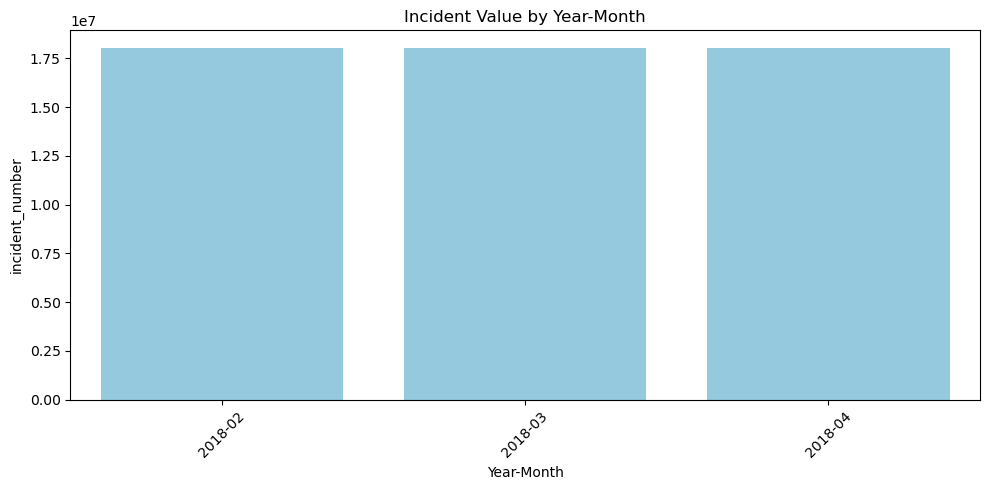

In [71]:
#All those incidents are reported in 02,03,04 of 2018
plt.figure(figsize=(10, 5))
sns.barplot(data=df1, x='year_month', y='incident_number', color='skyblue')

plt.xticks(rotation=45)
plt.title('Incident Value by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('incident_number')
plt.tight_layout()
plt.show()

In [ ]:
# Snowflake connection
conn = snowflake.connector.connect(
    user='BALACHAN',
    password='Snowflake@2025',
    account='eveooqb-uhc36776',  # e.g. abcd-xy12345
    warehouse='SF_FIRE_WAREHOUSE',
    database='FIRE_INCIDENT',
    schema='FIRE_SCHEMA'
)
#success, nchunks, nrows, output = write_pandas(
success, nchunks, nrows = write_pandas(
    conn,
    df1,
    table_name='SF_FIRE_INCIDENT',
    auto_create_table=True,
    overwrite=True,
    quote_identifiers=False
)

print(f"Upload success: {success}, Rows written: {nrows}")
conn.close()

In [ ]:
from sqlalchemy import create_engine
from snowflake.sqlalchemy import URL

engine = create_engine(URL(
    user='BALACHAN',
    password='Snowflake@2025',
    account='eveooqb-uhc36776',  # e.g. abcd-xy12345
    warehouse='SF_FIRE_WAREHOUSE',
    database='FIRE_INCIDENT',
    schema='FIRE_SCHEMA'
))

df1.to_sql('SF_FIRE_INCIDENT', con=engine, index=False, if_exists='replace')